In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
employeedata = pd.read_csv('Employee data.csv')
employeedata.head()

,Age,EnvironmentSatisfaction,Gender,MaritalStatus,MonthlyIncome
0,41,2,Female,Single,5993
1,49,3,Male,Married,5130
2,37,4,Male,Single,2090
3,33,4,Female,Married,2909
4,27,1,Male,Married,3468


Part 1: Data Exploration and Cleaning

In [44]:
# 1. Load and Examine the Dataset
print("Dataset Overview:")
print(employeedata.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   EnvironmentSatisfaction  1470 non-null   int64 
 2   Gender                   1470 non-null   object
 3   MaritalStatus            1470 non-null   object
 4   MonthlyIncome            1470 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 57.6+ KB
None


In [45]:
# Number of records and features
num_records = employeedata.shape[0]
num_features = employeedata.shape[1]
print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")

Number of records: 1470
Number of features: 5


In [46]:
# Check for missing values
missing_values = employeedata.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
Age                        0
EnvironmentSatisfaction    0
Gender                     0
MaritalStatus              0
MonthlyIncome              0
dtype: int64


In [47]:
# 2. Data Quality Assessment

# Identify outliers in MonthlyIncome
q1 = employeedata['MonthlyIncome'].quantile(0.25)
q3 = employeedata['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = employeedata[(employeedata['MonthlyIncome'] < lower_bound) | (employeedata['MonthlyIncome'] > upper_bound)]
print(f"\nNumber of outliers in MonthlyIncome: {outliers.shape[0]}")


Number of outliers in MonthlyIncome: 114


In [48]:
# Check for unusual values in Age
print("\nAge Statistics:")
print(employeedata['Age'].describe())


Age Statistics:
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


In [49]:
# Distribution of categorical variables
print("\nGender Distribution:")
print(employeedata['Gender'].value_counts())

print("\nMaritalStatus Distribution:")
print(employeedata['MaritalStatus'].value_counts())


Gender Distribution:
Gender
Male      882
Female    588
Name: count, dtype: int64

MaritalStatus Distribution:
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


In [50]:
# 3. Data Cleaning

# Handle outliers in MonthlyIncome (capping method)
employeedata['MonthlyIncome'] = np.where(
    employeedata['MonthlyIncome'] < lower_bound, lower_bound,
    np.where(employeedata['MonthlyIncome'] > upper_bound, upper_bound, employeedata['MonthlyIncome'])
)

# Create age groups
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70']
employeedata['AgeGroup'] = pd.cut(employeedata['Age'], bins=bins, labels=labels, right=False)

# Ensure categorical variables are properly formatted
employeedata['Gender'] = employeedata['Gender'].astype('category')
employeedata['MaritalStatus'] = employeedata['MaritalStatus'].astype('category')

Part 2: Descriptive Statistics and Visualization

In [51]:
# 1. Basic Statistics
mean_income = employeedata['MonthlyIncome'].mean()
median_income = employeedata['MonthlyIncome'].median()
std_income = employeedata['MonthlyIncome'].std()

average_age = employeedata['Age'].mean()
most_common_status = employeedata['MaritalStatus'].mode()[0]

print(f"\nMean Of Monthly Income: {mean_income}")
print(f"Median Of Monthly Income: {median_income}")
print(f"Standard Deviation of Monthly Income: {std_income}")
print(f"Average Age of Employees: {average_age}")
print(f"Most Common Marital Status: {most_common_status}")


Mean Of Monthly Income: 6361.891836734694
Median Of Monthly Income: 4919.0
Standard Deviation of Monthly Income: 4353.3454697079005
Average Age of Employees: 36.923809523809524
Most Common Marital Status: Married


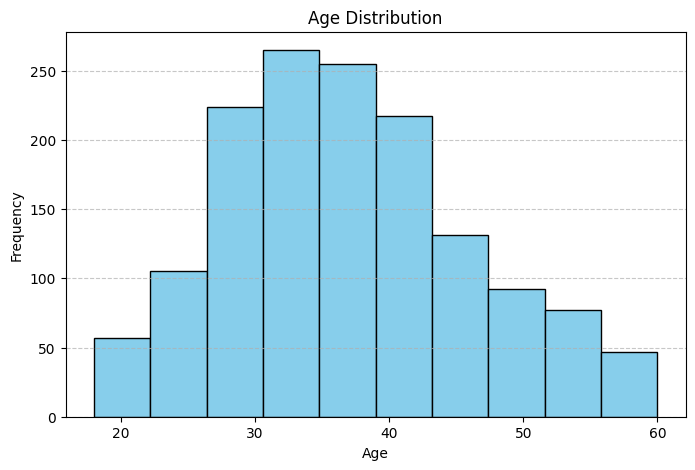

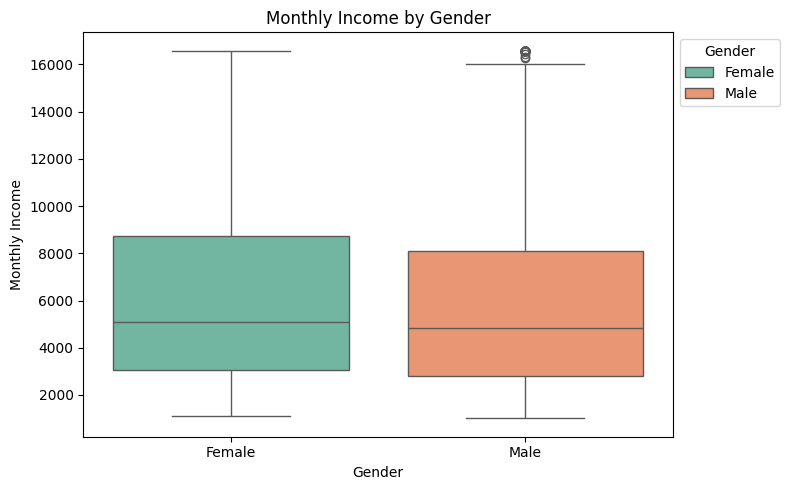

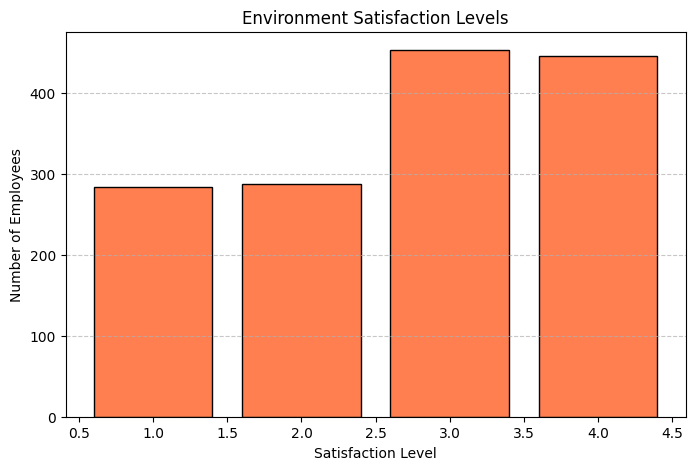

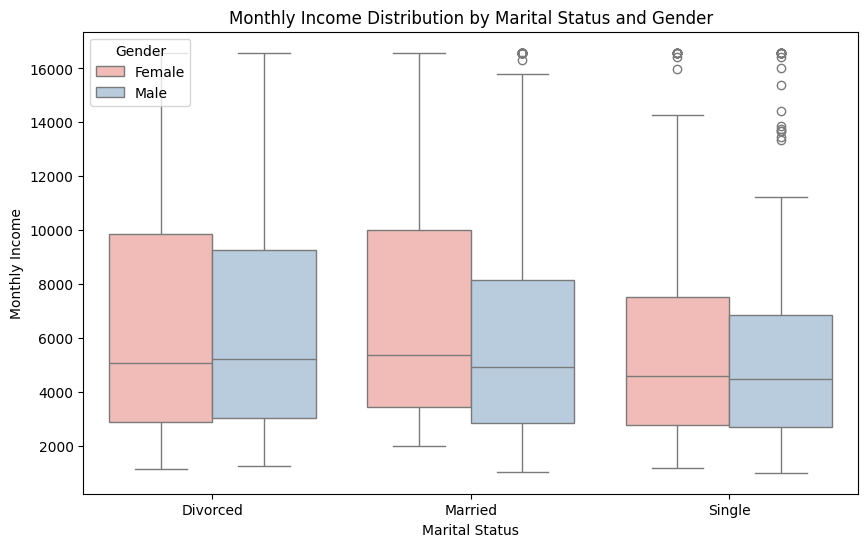

In [52]:
# 2. Data Visualization

# Histogram of Age distribution
plt.figure(figsize=(8, 5))
plt.hist(employeedata['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box plot of MonthlyIncome by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='MonthlyIncome', data=employeedata, palette='Set2', hue='Gender')  # Ensure hue is applied
plt.title('Monthly Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Income')

plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  
plt.show()

# Bar chart of EnvironmentSatisfaction levels
plt.figure(figsize=(8, 5))
env_satisfaction_counts = employeedata['EnvironmentSatisfaction'].value_counts().sort_index()
plt.bar(env_satisfaction_counts.index, env_satisfaction_counts.values, color='coral', edgecolor='black')
plt.title('Environment Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Combined visualization showing income distribution across MaritalStatus
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalStatus', y='MonthlyIncome', data=employeedata, hue='Gender', palette='Pastel1')
plt.title('Monthly Income Distribution by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Monthly Income')
plt.legend(title='Gender', loc='upper left')  
plt.show()

Part 3: Business Insights and Recommendations


In [53]:
# Key Insights
print("\nKey Insights:")

# Insight 1: Correlation between Age and MonthlyIncome
age_income_corr = employeedata['Age'].corr(employeedata['MonthlyIncome'])
print(f"1. Correlation between Age and MonthlyIncome: {age_income_corr:.2f}")
if age_income_corr > 0.5:
    print("   Older employees tend to have higher incomes.")
else:
    print("   Age does not strongly predict income.")

# Insight 2: Distribution of EnvironmentSatisfaction
satisfaction_levels = env_satisfaction_counts.idxmax()
print(f"2. Most employees have an EnvironmentSatisfaction level of {satisfaction_levels}.")

# Insight 3: Gender-wise Income Disparity
avg_income_by_gender = employeedata.groupby('Gender')['MonthlyIncome'].mean()
gender_income_diff = avg_income_by_gender.max() - avg_income_by_gender.min()
print(f"3. Gender income disparity: {gender_income_diff:.2f}.")
if gender_income_diff > 0:
    print("   Male and Female employees have noticeable income differences.")

# Recommendations
print("\nRecommendations:")
print("1. Address income disparities by reviewing compensation policies for fairness.")
print("2. Enhance satisfaction levels through targeted initiatives in lower-rated categories.")
print("3. Offer training or growth opportunities to employees in younger age groups to help increase their income potential.")



Key Insights:
1. Correlation between Age and MonthlyIncome: 0.50
   Age does not strongly predict income.
2. Most employees have an EnvironmentSatisfaction level of 3.
3. Gender income disparity: 340.40.
   Male and Female employees have noticeable income differences.

Recommendations:
1. Address income disparities by reviewing compensation policies for fairness.
2. Enhance satisfaction levels through targeted initiatives in lower-rated categories.
3. Offer training or growth opportunities to employees in younger age groups to help increase their income potential.


C:\Users\DOLPHIX ELECTRONICS\AppData\Local\Temp\ipykernel_14128\4167900961.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_by_gender = employeedata.groupby('Gender')['MonthlyIncome'].mean()


In [54]:
# Save cleaned data to a new file
cleaned_file_path = 'Employee Data.csv'
employeedata.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to {cleaned_file_path}")


Cleaned data saved to Employee Data.csv
